In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #Necesario para la estandarizacion de los datos
import numpy as np

In [4]:
#Colocando valores de la data a las variables x e y
vinos = datasets.load_wine()
variables = np.array(vinos.feature_names)
x_vinos = vinos.data
y_vinos = vinos.target

In [16]:
#Normalizacion de los valores de “X” (estandarizando valores de X)
scaler = StandardScaler()
scaler.fit(vinos.data)
x_scaled = scaler.transform(vinos.data)
x = pd.DataFrame(x_scaled, columns=variables, ) #Si deseas trabajar con los datos sin estandarizar, solo cambia x_scaled por x_vinos
y = pd.DataFrame(y_vinos, columns= ["Target"])
x.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Cantidad de Centroides: 1 ---  Precision: 0.0
Cantidad de Centroides: 2 ---  Precision: 0.3743
Cantidad de Centroides: 3 ---  Precision: 0.8975
Cantidad de Centroides: 4 ---  Precision: 0.7177
Cantidad de Centroides: 5 ---  Precision: 0.6523
Cantidad de Centroides: 6 ---  Precision: 0.4712
Cantidad de Centroides: 7 ---  Precision: 0.5552
Cantidad de Centroides: 8 ---  Precision: 0.4494
Cantidad de Centroides: 9 ---  Precision: 0.4016
Cantidad de Centroides: 10 ---  Precision: 0.3357


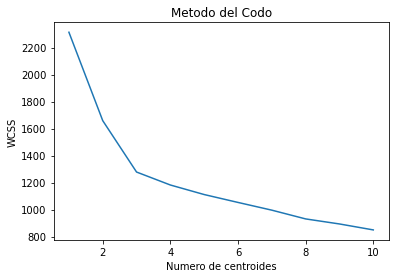

Se recomienda emplear una cantidad de 3 centroides, para asi garantizar una precision de 0.8975


In [17]:
#Elaboracion del Modelo y Metodo del Codo combinados

wccs =[]
n = 1
acc = 0
for i in range(1, 11): #Me hara el Kmeans utilizando la k entre 1 al 10 , y verificando cual es el k con mayor porcentaje de acierto 
    codo = KMeans(n_clusters = i, max_iter = 1000, random_state = 0)
    codo.fit(x) #Entrenando mis X
    y_kmeans = codo.predict(x) #prediciendo las salidas de las x
    wccs.append(codo.inertia_)
    accuracy =  round(metrics.adjusted_rand_score(y_vinos, y_kmeans), 4) #comparamos los datos de la prediccion con los datos del target real
    print(f'Cantidad de Centroides: {i} ---  Precision: {accuracy}')
    if accuracy > acc:
        acc = accuracy
        n = i
plt.plot(range(1, 11), wccs)
plt.title('Metodo del Codo')
plt.xlabel('Numero de centroides')
plt.ylabel('WCSS')
plt.show()
print(f"Se recomienda emplear una cantidad de {n} centroides, para asi garantizar una precision de {acc}")

In [27]:
#Planteamos el modelo Kmeans especificamente para los clusters n = 3
modelo = KMeans(n_clusters = n, max_iter = 1000)
modelo.fit(x)
y_labels = modelo.labels_
y_kmeans = modelo.predict(x)
print('predicciones ', y_kmeans)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])

predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
#Precision
accuracy =  metrics.adjusted_rand_score(y_vinos, y_kmeans)
print(round(accuracy, 5))

0.89749


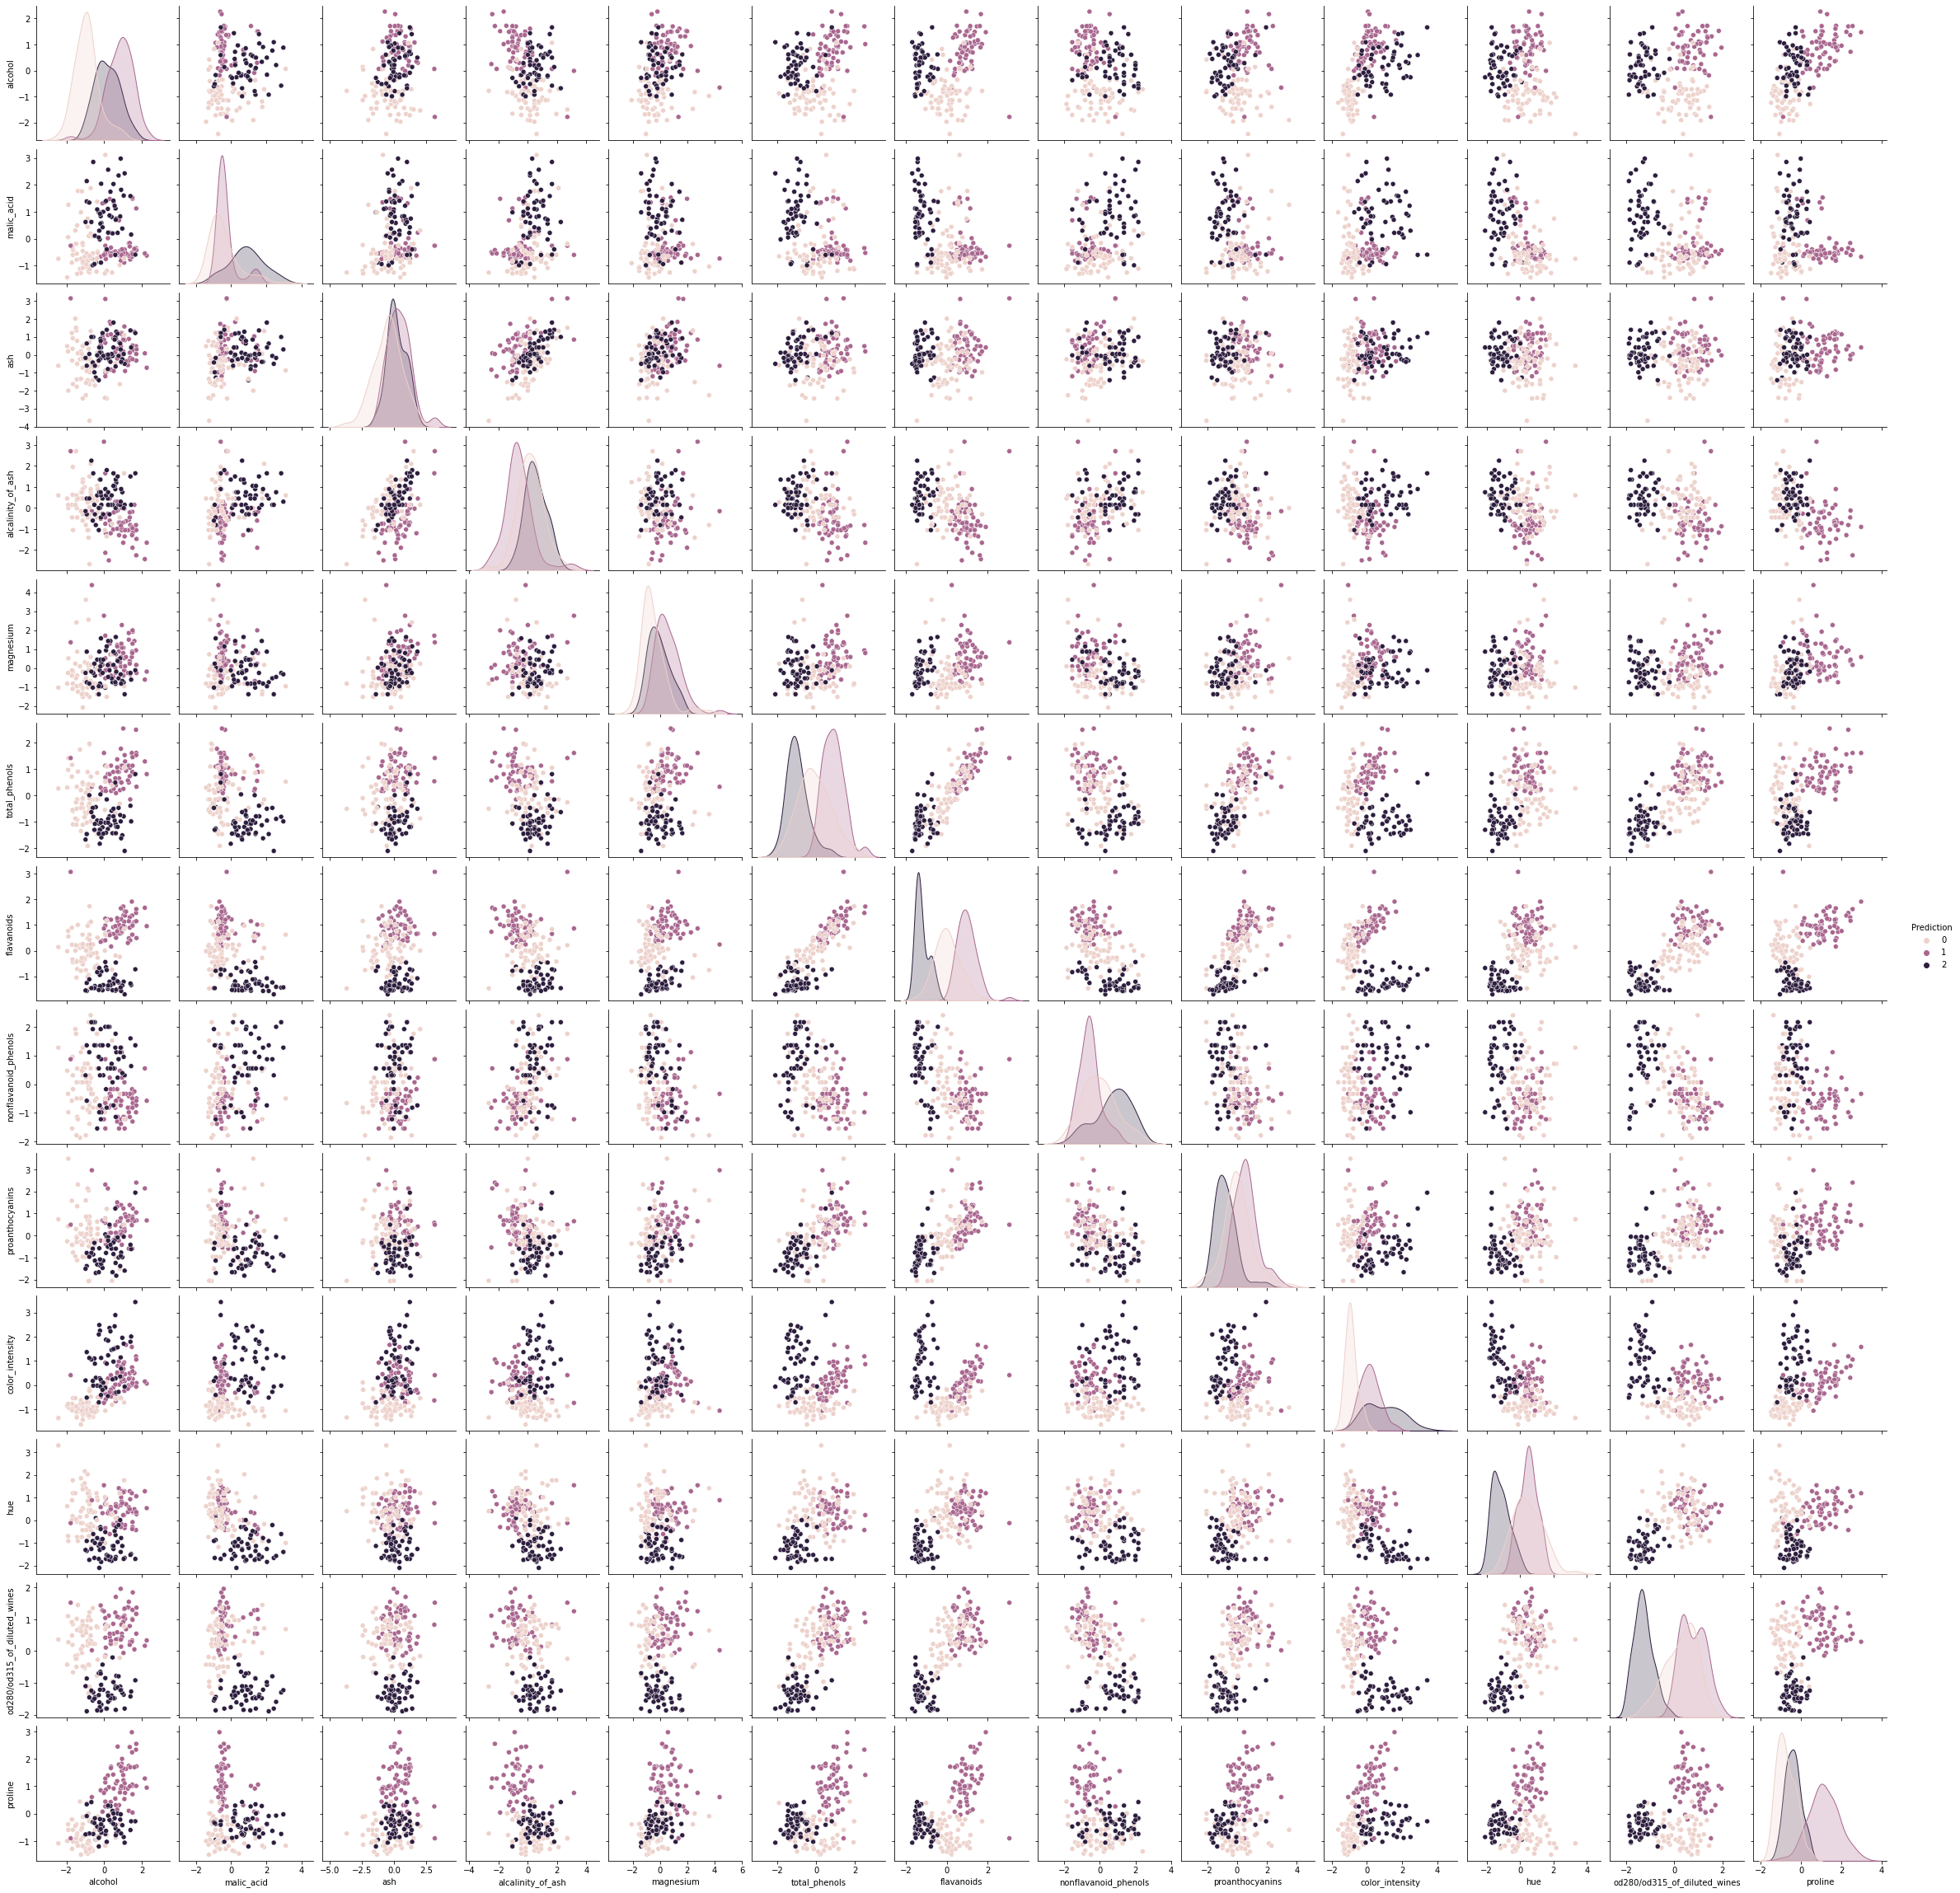

In [30]:
# Concateno el dataset de entrada con el de la prediccion (en este caso 13 * 13)
Z = pd.concat([x, y_kmeans_df], axis = 1)
# Grafico
sns.pairplot(Z, hue = 'Prediction') #Lo de la columna prediction seran mis puntos